#Dashboard: Analysis for Reviews Data
Dikerjakan dalam rangka menyelesaikan Tugas Besar Basis Data dan Pemrograman SQL untuk Big Data

Dibuat oleh:

*   Ni Luh Melika Candra Widyani Mas (6181901065)
*   Almatiara Levi Utami (6181901069)




Dataset yang digunakan:


*   amazon_apparel_reviews.csv
*   amazon_beauty_reviews.csv
*   amazon_jewelry_reviews.csv
*   amazon_shoes_reviews.csv
*   drug_reviews.csv




#Tujuan:
Pada tugas ini ada beberapa hal yang ingin dicapai. Dengan melakukan hal ini ingin dibuat OLAP (Online Analytical Processing) di mana adanya kecepatan laporan analisis. Berikut adalah hal-hal yang ingin dicapai atau ditampilkan :

*   Mengetahui rata-rata rating pada masing-masing kategori produk
*   Mengetahui 10 tertinggi jumlah vote review untuk masing-masing barang
*   Mengetahui kata-kata yang paling banyak muncul pada review untuk masing-masing kategori
*   Mengetahui jumlah produk yang direview pada masing-masing kategori
*   Mengetahui banyaknya jumlah review yang dilakukan per harinya dalam satuan minggu













Dimension dan Fact Table
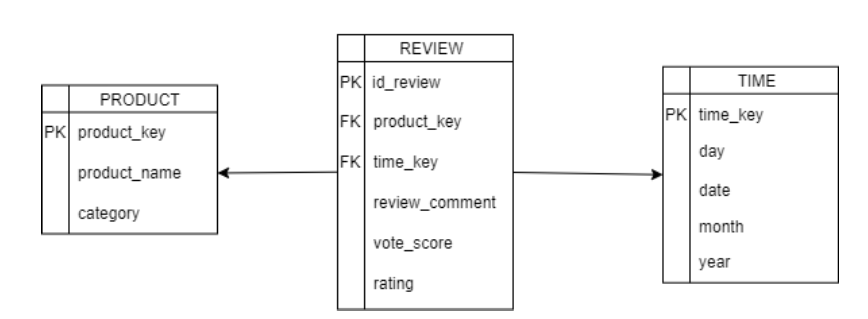

#Langkah-langkah Program

Mengimport library yang digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymysql
from wordcloud import WordCloud, STOPWORDS

Menyambungkan program dengan database mysql

In [ ]:
connection = pymysql.connect(host="localhost", 
                             port=3307, 
                             user="root", 
                             passwd="melikacantik", database="tubes_basdat")
cursor = connection.cursor()

Mengambil data yang ada di dimension dan fact table

In [ ]:
cursor.execute("select * from review_table")
review_table = cursor.fetchall()
cursor.execute("select * from product_table")
product_table = cursor.fetchall()
cursor.execute("select * from time_table")
time_table = cursor.fetchall()


#Hasil Visualisasi


**Dashboard 1: Mencari rata-rata rating perkategori**

In [ ]:
cursor.execute("select * from average_rating_dashboard")
average_rating_dahsboard = cursor.fetchall()

In [ ]:
category = []
for value in average_rating_dahsboard:
    category.append(value[0])

average_rating = []
for value in average_rating_dahsboard:
    average_rating.append(value[1])

data={'category':category,'rating':average_rating}
df=pd.DataFrame(data)



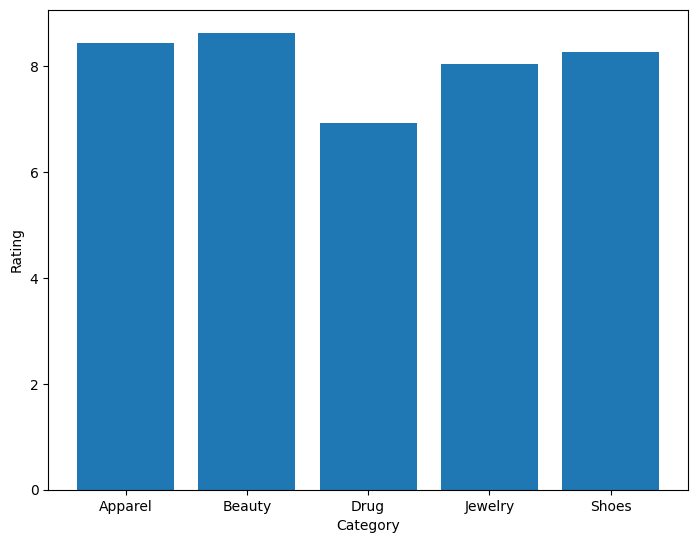

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Category')
ax.set_ylabel('Rating')

#yang y duluan baru x
ax.bar(df['category'], df['rating'])
plt.show()


Berdasarkan hasil yang didapatkan untuk rata-rata rating tertinggi ada pada produk kecantikan dan yang terendah ada pada produk obat-obatan. 

**Dashboard 2: Mencari 10 produk dengan *vote_score* tertinggi**

In [ ]:
cursor.execute("select * from vote_score_dashboard")
vote_score_dashboard = cursor.fetchall()

In [ ]:
nama_product = []
for value in vote_score_dashboard:
    nama_product.append(value[0])

category = []
for value in vote_score_dashboard:
    category.append(value[1])

vote_score = []
for value in vote_score_dashboard:
    vote_score.append(value[2])

data={'product':nama_product,'category':category,'vote_score':vote_score}
df=pd.DataFrame(data)

In [ ]:
df

,product,category,vote_score
0,Guanfacine,Drug,192
1,Effexor XR,Drug,166
2,Cialis,Drug,132
3,Estradiol,Drug,128
4,Buprenorphine,Drug,125
5,Phillips' Milk of Magnesia,Drug,120
6,Eflornithine,Drug,99
7,Ledipasvir / sofosbuvir,Drug,94
8,Alprazolam,Drug,87
9,Mobic,Drug,82


Berdasarkan hasil ini didapatkan produk-produk dengan kategori Drug atau obat-obatan mendominasi dengan jumlah vote tertinggi.

**Dashboard 3: Mencari Kata pada Review yang Paling Sering Muncul di Seluruh Produk dan di Setiap Kategori Produk menggunakan Word Cloud**

In [ ]:
cursor.execute("select * from category_review_dashboard")
category_review_dashboard = cursor.fetchall()

In [ ]:
apparel = ""
drug = ""
shoes = ""
beauty = ""
jewelry = ""

for value in category_review_dashboard:
    if(value[0] == 'Apparel'):
        apparel+= value[1]
    if(value[0] == 'Drug'):
        drug+= value[1]
    if(value[0] == 'Shoes'):
        shoes+= value[1]
    if(value[0] == 'Beauty'):
        beauty+= value[1]
    if(value[0] == 'Jewelry'):
        jewelry += value[1]


**Hasil Word Cloud dari seluruh Review Produk**


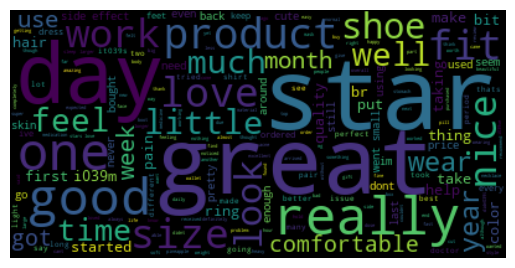

In [ ]:
wordcloud = WordCloud().generate(apparel+drug+shoes+beauty+jewelry)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan hasil didapatkan dari data keseluruhan lewat kata-kata yang muncul pada word cloud ini menunjukkan hasil review yang positif yang didasari oleh kemunculan kata tertentu. Kata tersebut seperti great, good, comfortable dan lainnya.


**Hasil Word Cloud dari Review Produk Pakaian (*Apparel*)**

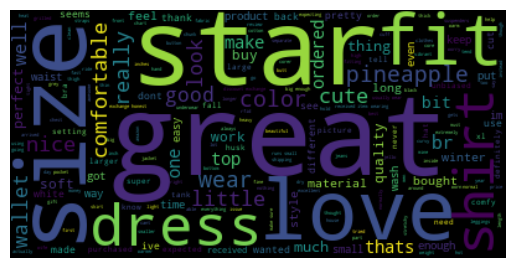

In [ ]:
wordcloud = WordCloud().generate(apparel)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan kategori apparel didapati kata-kata positif juga mendominasi seperti great, love, fit dan lain sebagainya. Hal ini menandakan produk-produk berkategori apparel ini memiliki review yang positif.


**Hasil Word Cloud dari Review Produk Sepatu (*Shoes*)**

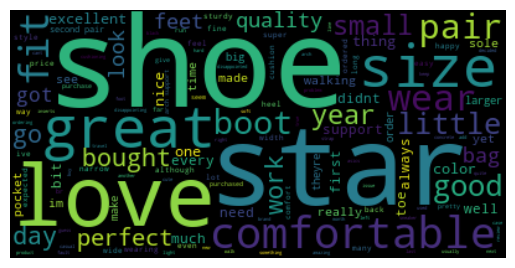

In [ ]:
wordcloud = WordCloud().generate(shoes)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan kategori shoes didapati kata-kata positif juga mendominasi seperti great, perfect, love dan lain sebagainya. Hal ini menandakan produk-produk berkategori shoes ini memiliki review yang positif.


**Hasil Word Cloud dari Review Produk Perhiasan (*Jewelry*)**

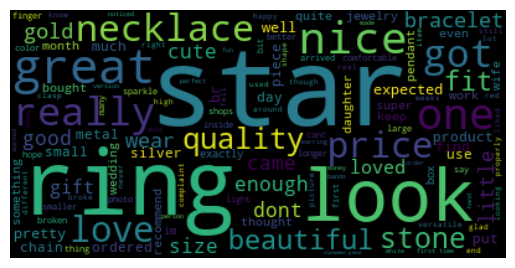

In [ ]:
wordcloud = WordCloud().generate(jewelry)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan kategori jewelry didapati kata-kata positif juga mendominasi seperti cute, nice, beautiful, great dan lain sebagainya. Hal ini menandakan produk-produk berkategori jewelry ini memiliki review yang positif. Barang yang terjual juga muncul katanya seperti necklace dan ring.


**Hasil Word Cloud dari Review Produk Kosmetik (*Beauty*)**

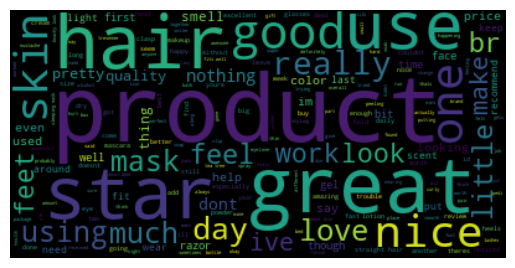

In [ ]:
wordcloud = WordCloud().generate(beauty)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan kategori beauty didapati kata-kata positif juga mendominasi seperti great, love, fit dan lain sebagainya. Hal ini menandakan produk-produk berkategori beauty ini memiliki review yang positif.

**Hasil Word Cloud dari Review Produk Obat-obatan (*Drug*)**

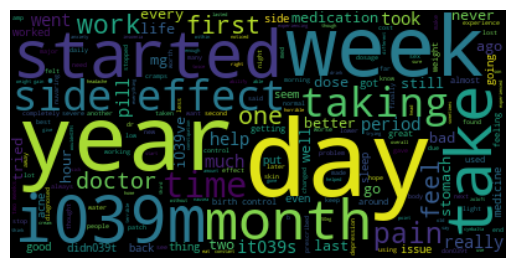

In [ ]:
wordcloud = WordCloud().generate(drug)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan kategori drug didapati kata-kata positif juga mendominasi seperti better dan lain sebagainya. Tetapi untuk kata-kata yang dominan muncul adalah seperti yang menandakan waktu atau periode seperti week, day, year dan month. Selain itu juga ada kata yang menonjol yaitu side effect.

**Dashboard 4: Mencari Jumlah Produk per Kategori**

In [ ]:
cursor.execute("select * from product_category_dashboard")
product_category_dashboard = cursor.fetchall()

In [ ]:
category = []
for value in product_category_dashboard:
    category.append(value[0])

product_name = []
for value in product_category_dashboard:
    product_name.append(value[1])

data={'category':category,'banyak_product':product_name}
df=pd.DataFrame(data)

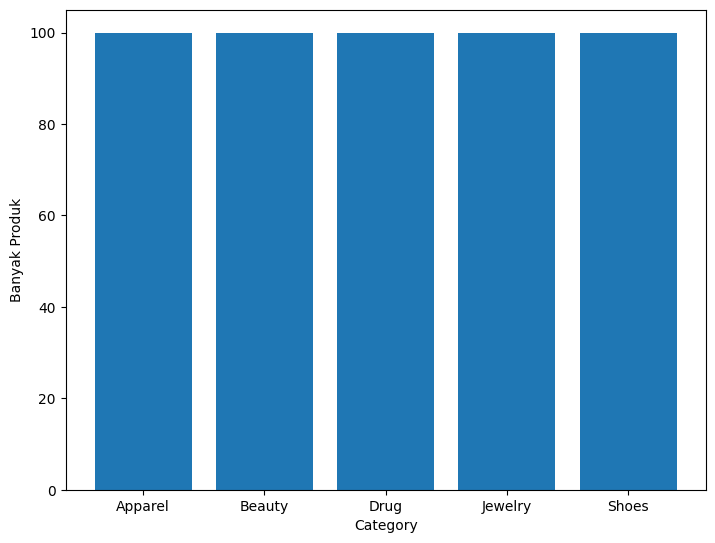

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Category')
ax.set_ylabel('Banyak Produk')

#yang y duluan baru x
ax.bar(df['category'], df['banyak_product'])
plt.show()

Berdasarkan hasil ini didapatkan produk-produk dengan berbagai kategori yang berbeda memiliki banyak produk yang sama.


**Dashboard 4: Mencari Tren Waktu Review per Hari**

In [ ]:
cursor.execute("select * from day_review_dashboard")
day_review_dashboard = cursor.fetchall()

In [ ]:
day = []
for value in day_review_dashboard:
    day.append(value[0])

count_review = []
for value in day_review_dashboard:
    count_review.append(value[1])

data={'day':day,'count_review':count_review}
df=pd.DataFrame(data)


In [ ]:
data_2 = data={'day':['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday'],
'count_review': [11, 314, 16, 13, 25, 110, 11]}

df = pd.DataFrame(data_2)

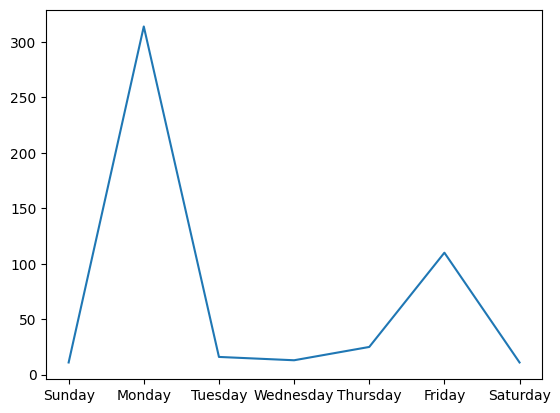

In [ ]:
plt.plot(df['day'], df['count_review'])
plt.show()


Berdasarkan hasil ini didapatkan jumlah review yang terbanyak ada pada hari Senin dan Jumat.
